In [1]:
!pip install geopy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from geopy import distance
sys.path.append('../scripts')
from helpers import Helper

Defaulting to user installation because normal site-packages is not writeable


Exploring Orders completed data

In [2]:
df_orders = pd.read_csv('../data/nb.csv')

In [3]:
# df_orders.head()

In [4]:
df_orders.isna().sum()

Trip ID                0
Trip Origin            0
Trip Destination       0
Trip Start Time     1651
Trip End Time          1
dtype: int64

In [5]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Trip ID           536020 non-null  int64 
 1   Trip Origin       536020 non-null  object
 2   Trip Destination  536020 non-null  object
 3   Trip Start Time   534369 non-null  object
 4   Trip End Time     536019 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.4+ MB


In [6]:
df_orders.describe()

,Trip ID
count,5.360200e+05
mean,9.910221e+05
std,3.456364e+05
min,3.919960e+05
25%,6.935610e+05
50%,9.910085e+05
75%,1.281570e+06
max,1.637709e+06


In [7]:
df_orders.shape

(536020, 5)

Lets rename the column names to make it easier when storing to a database later

In [8]:
df_orders = df_orders.rename(columns={'Trip ID': 'trip_id', 
                    'Trip Origin': 'trip_origin', 
                    'Trip Destination': 'trip_destination', 
                    'Trip Start Time': 'trip_start_time', 
                    'Trip End Time': 'trip_end_time',})
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   trip_id           536020 non-null  int64 
 1   trip_origin       536020 non-null  object
 2   trip_destination  536020 non-null  object
 3   trip_start_time   534369 non-null  object
 4   trip_end_time     536019 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.4+ MB


Separate the latitude and longitude from trip_origin and trip_destination columns

In [9]:
df_orders['trip_origin_lat'] = df_orders['trip_origin'].apply(lambda x: str(x).split(',')[0])
df_orders['trip_origin_long'] = df_orders['trip_origin'].apply(lambda y: str(y).split(',')[1])

In [10]:
# df_orders.head()
df_orders['trip_destn_lat'] = df_orders['trip_destination'].apply(lambda x: str(x).split(',')[0])
df_orders['trip_destn_long'] = df_orders['trip_destination'].apply(lambda y: str(y).split(',')[1])

In [11]:
df_orders.head(2)

,trip_id,trip_origin,trip_destination,trip_start_time,trip_end_time,trip_origin_lat,trip_origin_long,trip_destn_lat,trip_destn_long
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37,6.508813001668548,3.37740316890347,6.650969799999999,3.3450307
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28,6.4316714,3.4555375,6.4280814653326,3.4721885847586


Find the distances between trip origin and trip destination

In [12]:
df_orders['trip_distance']=df_orders.apply(lambda x:distance.distance((x['trip_origin_lat'],x['trip_origin_long']), 
(x['trip_destn_lat'],x['trip_destn_long'])).km,axis=1)

In [13]:
df_orders.head()

,trip_id,trip_origin,trip_destination,trip_start_time,trip_end_time,trip_origin_lat,trip_origin_long,trip_destn_lat,trip_destn_long,trip_distance
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37,6.508813001668548,3.37740316890347,6.650969799999999,3.3450307,16.123451
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28,6.4316714,3.4555375,6.4280814653326,3.4721885847586,1.884305
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23,6.631679399999999,3.3388976,6.508324099999999,3.3590397,13.822393
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42,6.572757200000001,3.3677082,6.584881099999999,3.3614073,1.511034
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,6.6010417,3.2766339,6.4501069,3.3916154,20.984319


lets see if we can get an insight using the info on hand

<AxesSubplot:xlabel='trip_id', ylabel='trip_distance'>

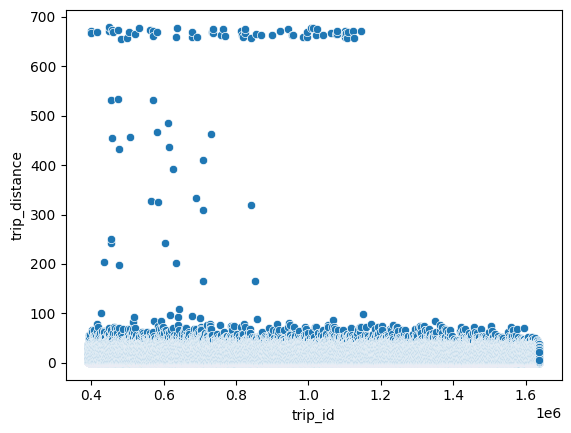

In [14]:
sns.scatterplot(y=df_orders['trip_distance'],x=df_orders['trip_id'])

Drivers locations data

In [15]:
df_drivers = pd.read_csv('../data/driver_locations_during_request.csv')

In [16]:
df_drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557740 entries, 0 to 1557739
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1557740 non-null  int64  
 1   order_id       1557740 non-null  int64  
 2   driver_id      1557740 non-null  int64  
 3   driver_action  1557740 non-null  object 
 4   lat            1557740 non-null  float64
 5   lng            1557740 non-null  float64
 6   created_at     0 non-null        float64
 7   updated_at     0 non-null        float64
dtypes: float64(4), int64(3), object(1)
memory usage: 95.1+ MB


In [17]:
df_drivers.isnull().sum()

id                     0
order_id               0
driver_id              0
driver_action          0
lat                    0
lng                    0
created_at       1557740
updated_at       1557740
dtype: int64

drop created_at and updated_at columns as they have no data 

In [18]:
cols = ['created_at','updated_at']


In [19]:
df_drivers.drop(cols,inplace=True,axis=1)

In [20]:
df_drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557740 entries, 0 to 1557739
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1557740 non-null  int64  
 1   order_id       1557740 non-null  int64  
 2   driver_id      1557740 non-null  int64  
 3   driver_action  1557740 non-null  object 
 4   lat            1557740 non-null  float64
 5   lng            1557740 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 71.3+ MB


Merge df_orders and df_drivers on their common column trip_id and order_id respectively

In [21]:
merge_df = df_drivers.merge(df_orders, how='inner', left_on='order_id',right_on="trip_id")
merge_df.head()

,id,order_id,driver_id,driver_action,lat,lng,trip_id,trip_origin,trip_destination,trip_start_time,trip_end_time,trip_origin_lat,trip_origin_long,trip_destn_lat,trip_destn_long,trip_distance
0,1,392001,243828,accepted,6.602207,3.270465,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,6.6010417,3.2766339,6.4501069,3.3916154,20.984319
1,2,392001,243588,rejected,6.592097,3.287445,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,6.6010417,3.2766339,6.4501069,3.3916154,20.984319
2,3,392001,243830,rejected,6.596133,3.281784,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,6.6010417,3.2766339,6.4501069,3.3916154,20.984319
3,4,392001,243539,rejected,6.596142,3.280526,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,6.6010417,3.2766339,6.4501069,3.3916154,20.984319
4,5,392001,171653,rejected,6.609232,3.288800,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,6.6010417,3.2766339,6.4501069,3.3916154,20.984319


In [22]:
merge_df.dtypes

id                    int64
order_id              int64
driver_id             int64
driver_action        object
lat                 float64
lng                 float64
trip_id               int64
trip_origin          object
trip_destination     object
trip_start_time      object
trip_end_time        object
trip_origin_lat      object
trip_origin_long     object
trip_destn_lat       object
trip_destn_long      object
trip_distance       float64
dtype: object

In [23]:
UTIL = Helper()

In [24]:
def convert_to_numeric(df,cols):
    for col in cols:
        df[col] = pd.to_numeric(df[col])
    return df

In [25]:
# convert object typee columns to numeric
cols = ['trip_origin_lat','trip_origin_long','trip_destn_lat','trip_destn_long'] 
merge_df = convert_to_numeric(merge_df,cols)

In [26]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1557740 entries, 0 to 1557739
Data columns (total 16 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1557740 non-null  int64  
 1   order_id          1557740 non-null  int64  
 2   driver_id         1557740 non-null  int64  
 3   driver_action     1557740 non-null  object 
 4   lat               1557740 non-null  float64
 5   lng               1557740 non-null  float64
 6   trip_id           1557740 non-null  int64  
 7   trip_origin       1557740 non-null  object 
 8   trip_destination  1557740 non-null  object 
 9   trip_start_time   1555718 non-null  object 
 10  trip_end_time     1557740 non-null  object 
 11  trip_origin_lat   1557740 non-null  float64
 12  trip_origin_long  1557740 non-null  float64
 13  trip_destn_lat    1557740 non-null  float64
 14  trip_destn_long   1557740 non-null  float64
 15  trip_distance     1557740 non-null  float64
dtype

In [27]:
#convert to datetime

merge_df['trip_start_time'] = pd.to_datetime(merge_df['trip_start_time'])
merge_df['trip_end_time'] = pd.to_datetime(merge_df['trip_end_time'])
merge_df.dtypes

id                           int64
order_id                     int64
driver_id                    int64
driver_action               object
lat                        float64
lng                        float64
trip_id                      int64
trip_origin                 object
trip_destination            object
trip_start_time     datetime64[ns]
trip_end_time       datetime64[ns]
trip_origin_lat            float64
trip_origin_long           float64
trip_destn_lat             float64
trip_destn_long            float64
trip_distance              float64
dtype: object

In [28]:
merge_df.drop(['trip_origin', 'trip_destination'], axis=1, inplace=True)

In [39]:
# Find trip Duration 
from datetime import datetime,timedelta,date
merge_df['trip_duration'] = (merge_df['trip_end_time'] - merge_df['trip_start_time']).astype('timedelta64[m]')
# minutes=[]
# for i in merge_df['trip_duration']:
#     minutes.append(i.seconds / 60)
# merge_df['trip_duration'] = minutes

In [41]:
merge_df.tail()

,id,order_id,driver_id,driver_action,lat,lng,trip_id,trip_start_time,trip_end_time,trip_origin_lat,trip_origin_long,trip_destn_lat,trip_destn_long,trip_distance,trip_duration,year,month,day_of_week
1557735,1557736,517948,243774,rejected,6.469036,3.566877,517948,2021-09-10 11:47:26,2021-09-10 13:30:13,6.443374,3.552312,6.500608,3.598194,8.112927,102.0,2021.0,9.0,Friday
1557736,1557737,517948,245447,rejected,6.425431,3.527358,517948,2021-09-10 11:47:26,2021-09-10 13:30:13,6.443374,3.552312,6.500608,3.598194,8.112927,102.0,2021.0,9.0,Friday
1557737,1557738,517948,239866,rejected,6.440013,3.525378,517948,2021-09-10 11:47:26,2021-09-10 13:30:13,6.443374,3.552312,6.500608,3.598194,8.112927,102.0,2021.0,9.0,Friday
1557738,1557739,517948,243774,rejected,6.469036,3.566877,517948,2021-09-10 11:47:26,2021-09-10 13:30:13,6.443374,3.552312,6.500608,3.598194,8.112927,102.0,2021.0,9.0,Friday
1557739,1557740,517948,244170,rejected,6.469390,3.572079,517948,2021-09-10 11:47:26,2021-09-10 13:30:13,6.443374,3.552312,6.500608,3.598194,8.112927,102.0,2021.0,9.0,Friday


In [31]:
merge_df['trip_duration'].max()

1427.9333333333334

In [32]:
# extract year, month and day of week
merge_df['year'] = pd.DatetimeIndex(merge_df['trip_start_time']).year
merge_df['month'] = pd.DatetimeIndex(merge_df['trip_start_time']).month
merge_df['day_of_week'] = merge_df['trip_start_time'].dt.day_name()
# merge_df.month = pd.to_datetime(merge_df.month)
merge_df.head()

,id,order_id,driver_id,driver_action,lat,lng,trip_id,trip_start_time,trip_end_time,trip_origin_lat,trip_origin_long,trip_destn_lat,trip_destn_long,trip_distance,trip_duration,year,month,day_of_week
0,1,392001,243828,accepted,6.602207,3.270465,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,6.601042,3.276634,6.450107,3.391615,20.984319,3.616667,2021.0,7.0,Thursday
1,2,392001,243588,rejected,6.592097,3.287445,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,6.601042,3.276634,6.450107,3.391615,20.984319,3.616667,2021.0,7.0,Thursday
2,3,392001,243830,rejected,6.596133,3.281784,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,6.601042,3.276634,6.450107,3.391615,20.984319,3.616667,2021.0,7.0,Thursday
3,4,392001,243539,rejected,6.596142,3.280526,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,6.601042,3.276634,6.450107,3.391615,20.984319,3.616667,2021.0,7.0,Thursday
4,5,392001,171653,rejected,6.609232,3.288800,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,6.601042,3.276634,6.450107,3.391615,20.984319,3.616667,2021.0,7.0,Thursday


In [33]:
# Get info for numerical columns
UTIL.get_df_info(merge_df)

,count,mean,std,min,25%,50%,75%,max
id,1557740.000000,778870.500000,449680.948501,1.000000,389435.750000,778870.500000,1168305.250000,1557740.000000
order_id,1557740.000000,419183.325677,14445.310018,392001.000000,406765.000000,421687.000000,429313.000000,517948.000000
driver_id,1557740.000000,234150.494470,22704.754768,121981.000000,242997.000000,243589.000000,244056.000000,247877.000000
lat,1557740.000000,6.536031,0.059981,6.409333,6.498694,6.544247,6.593276,7.702536
lng,1557740.000000,3.378877,0.053334,3.076561,3.348810,3.363504,3.385177,8.515414
trip_id,1557740.000000,419183.325677,14445.310018,392001.000000,406765.000000,421687.000000,429313.000000,517948.000000
trip_origin_lat,1557740.000000,6.535614,0.060291,1.000000,6.499041,6.537571,6.591357,8.226835
trip_origin_long,1557740.000000,3.380084,0.052789,1.000000,3.350304,3.368576,3.387219,8.522293
trip_destn_lat,1557740.000000,6.536080,0.073118,1.000000,6.464907,6.536754,6.596440,7.703160
trip_destn_long,1557740.000000,3.383548,0.074875,1.000000,3.342753,3.369833,3.406349,8.607887


In [34]:
UTIL.percent_missing(merge_df)

Total Percentage of Missing values: 0% 


In [35]:
# UTIL.check_outlier(merge_df)

/home/nhgirma/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


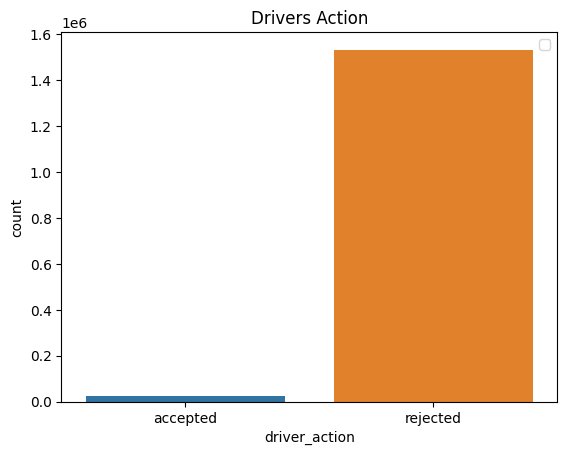

In [36]:
sns.countplot(merge_df['driver_action'])
plt.title('Drivers Action')
plt.legend()